## About

This plot is a [lollipop plot](/lollipop-plot). It shows the evolution of temperature variation compared to the average between 1951 and 1980.

The chart was made by [Joseph B.](https://www.barbierjoseph.com/). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![lollipop plot](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-lollipop-with-colormap-and-arrow.png?raw=true)


## Libraries

First, you need to install the following librairies:

- [matplotlib](/matplotlib) is used for creating the chart and add customization features
- [pandas](/pandas) for loading the dataset
- [pypalettes](/color-palette-finder) is used to get a nice color palette
- [pyfonts](/pyfonts) is used to load the font
- [drawarrow](/drawarrow) is used to make the arrow
- [highlight_text](/advanced-custom-annotations-matplotlib): to add beautiful annotations to the chart

And that's it!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pypalettes import load_cmap
from pyfonts import load_font
from highlight_text import fig_text, ax_text
from drawarrow import fig_arrow, ax_arrow

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://github.com/holtzy/The-Python-Graph-Gallery). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.


In [2]:
path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/temperature-variation.csv'
df = pd.read_csv(path)
df.head()

,Year,Change,Lowess(5)
0,1881,-0.09,-0.13
1,1882,-0.11,-0.17
2,1883,-0.18,-0.21
3,1884,-0.29,-0.24
4,1885,-0.34,-0.27


## Basic lollipop

Although the `stem()` function in Matplotlib is **designed for lollipop plots**, we'll use `plot()` and `scatter()` instead to manually add the lines and points. This approach simplifies customizing the color of each lollipop in the next step.

We add each point and each line using a `for` loop, which **iterates on each row** of our dataframe.


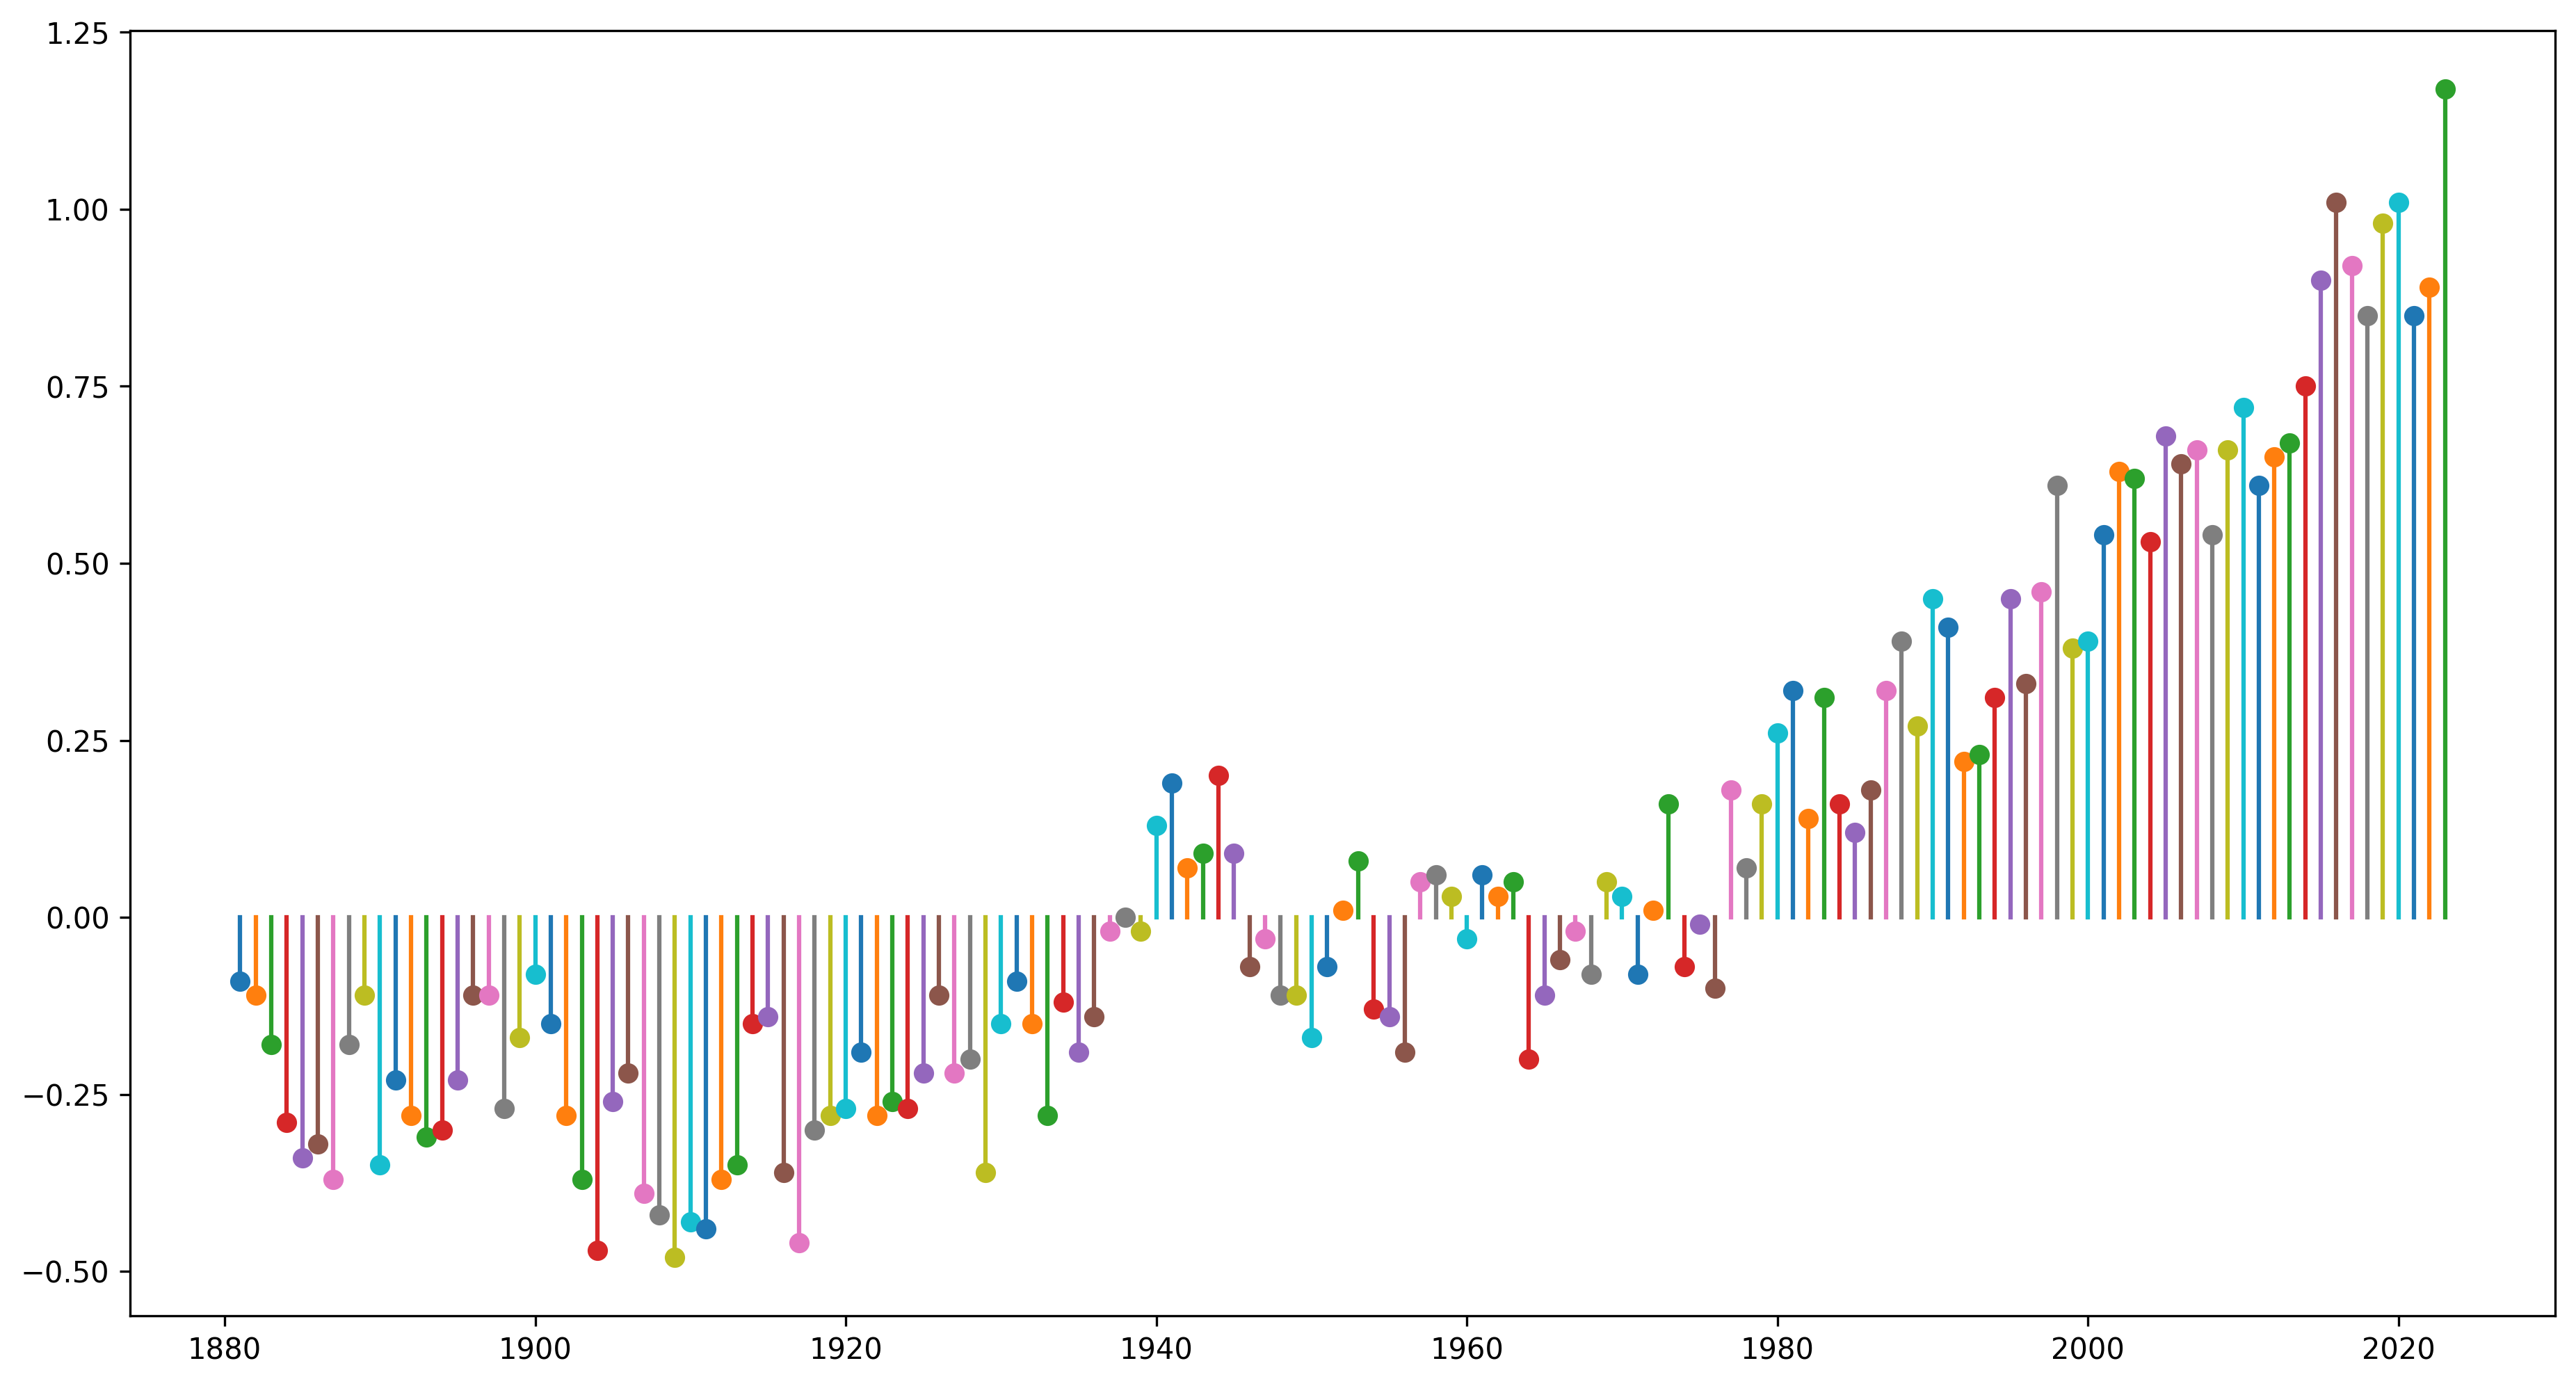

In [3]:
fig, ax = plt.subplots(figsize=(15,8), dpi=300)

for i, row in df.iterrows():
   year = row['Year']
   change = row['Change']
   ax.scatter(x=year, y=change)
   ax.plot([year,year], [0,change])

plt.show()

## Removes axis and custom color

In this step, we'll load a color map using `load_cmap()` from [pypalettes](/color-palette-finder), selecting the [Coconut](https://python-graph-gallery.com/color-palette-finder/?palette=coconut) palette for its gradient from blue ("cold") to red ("hot").

Then, within the `for` loop, we'll retrieve the appropriate **color based on the value** (temperature change in this case) and apply it to both `scatter()` and `plot()`.

And finally we remove all elements of the axis with `ax.set_axis_off()` since it's not very good looking and want to create our own.


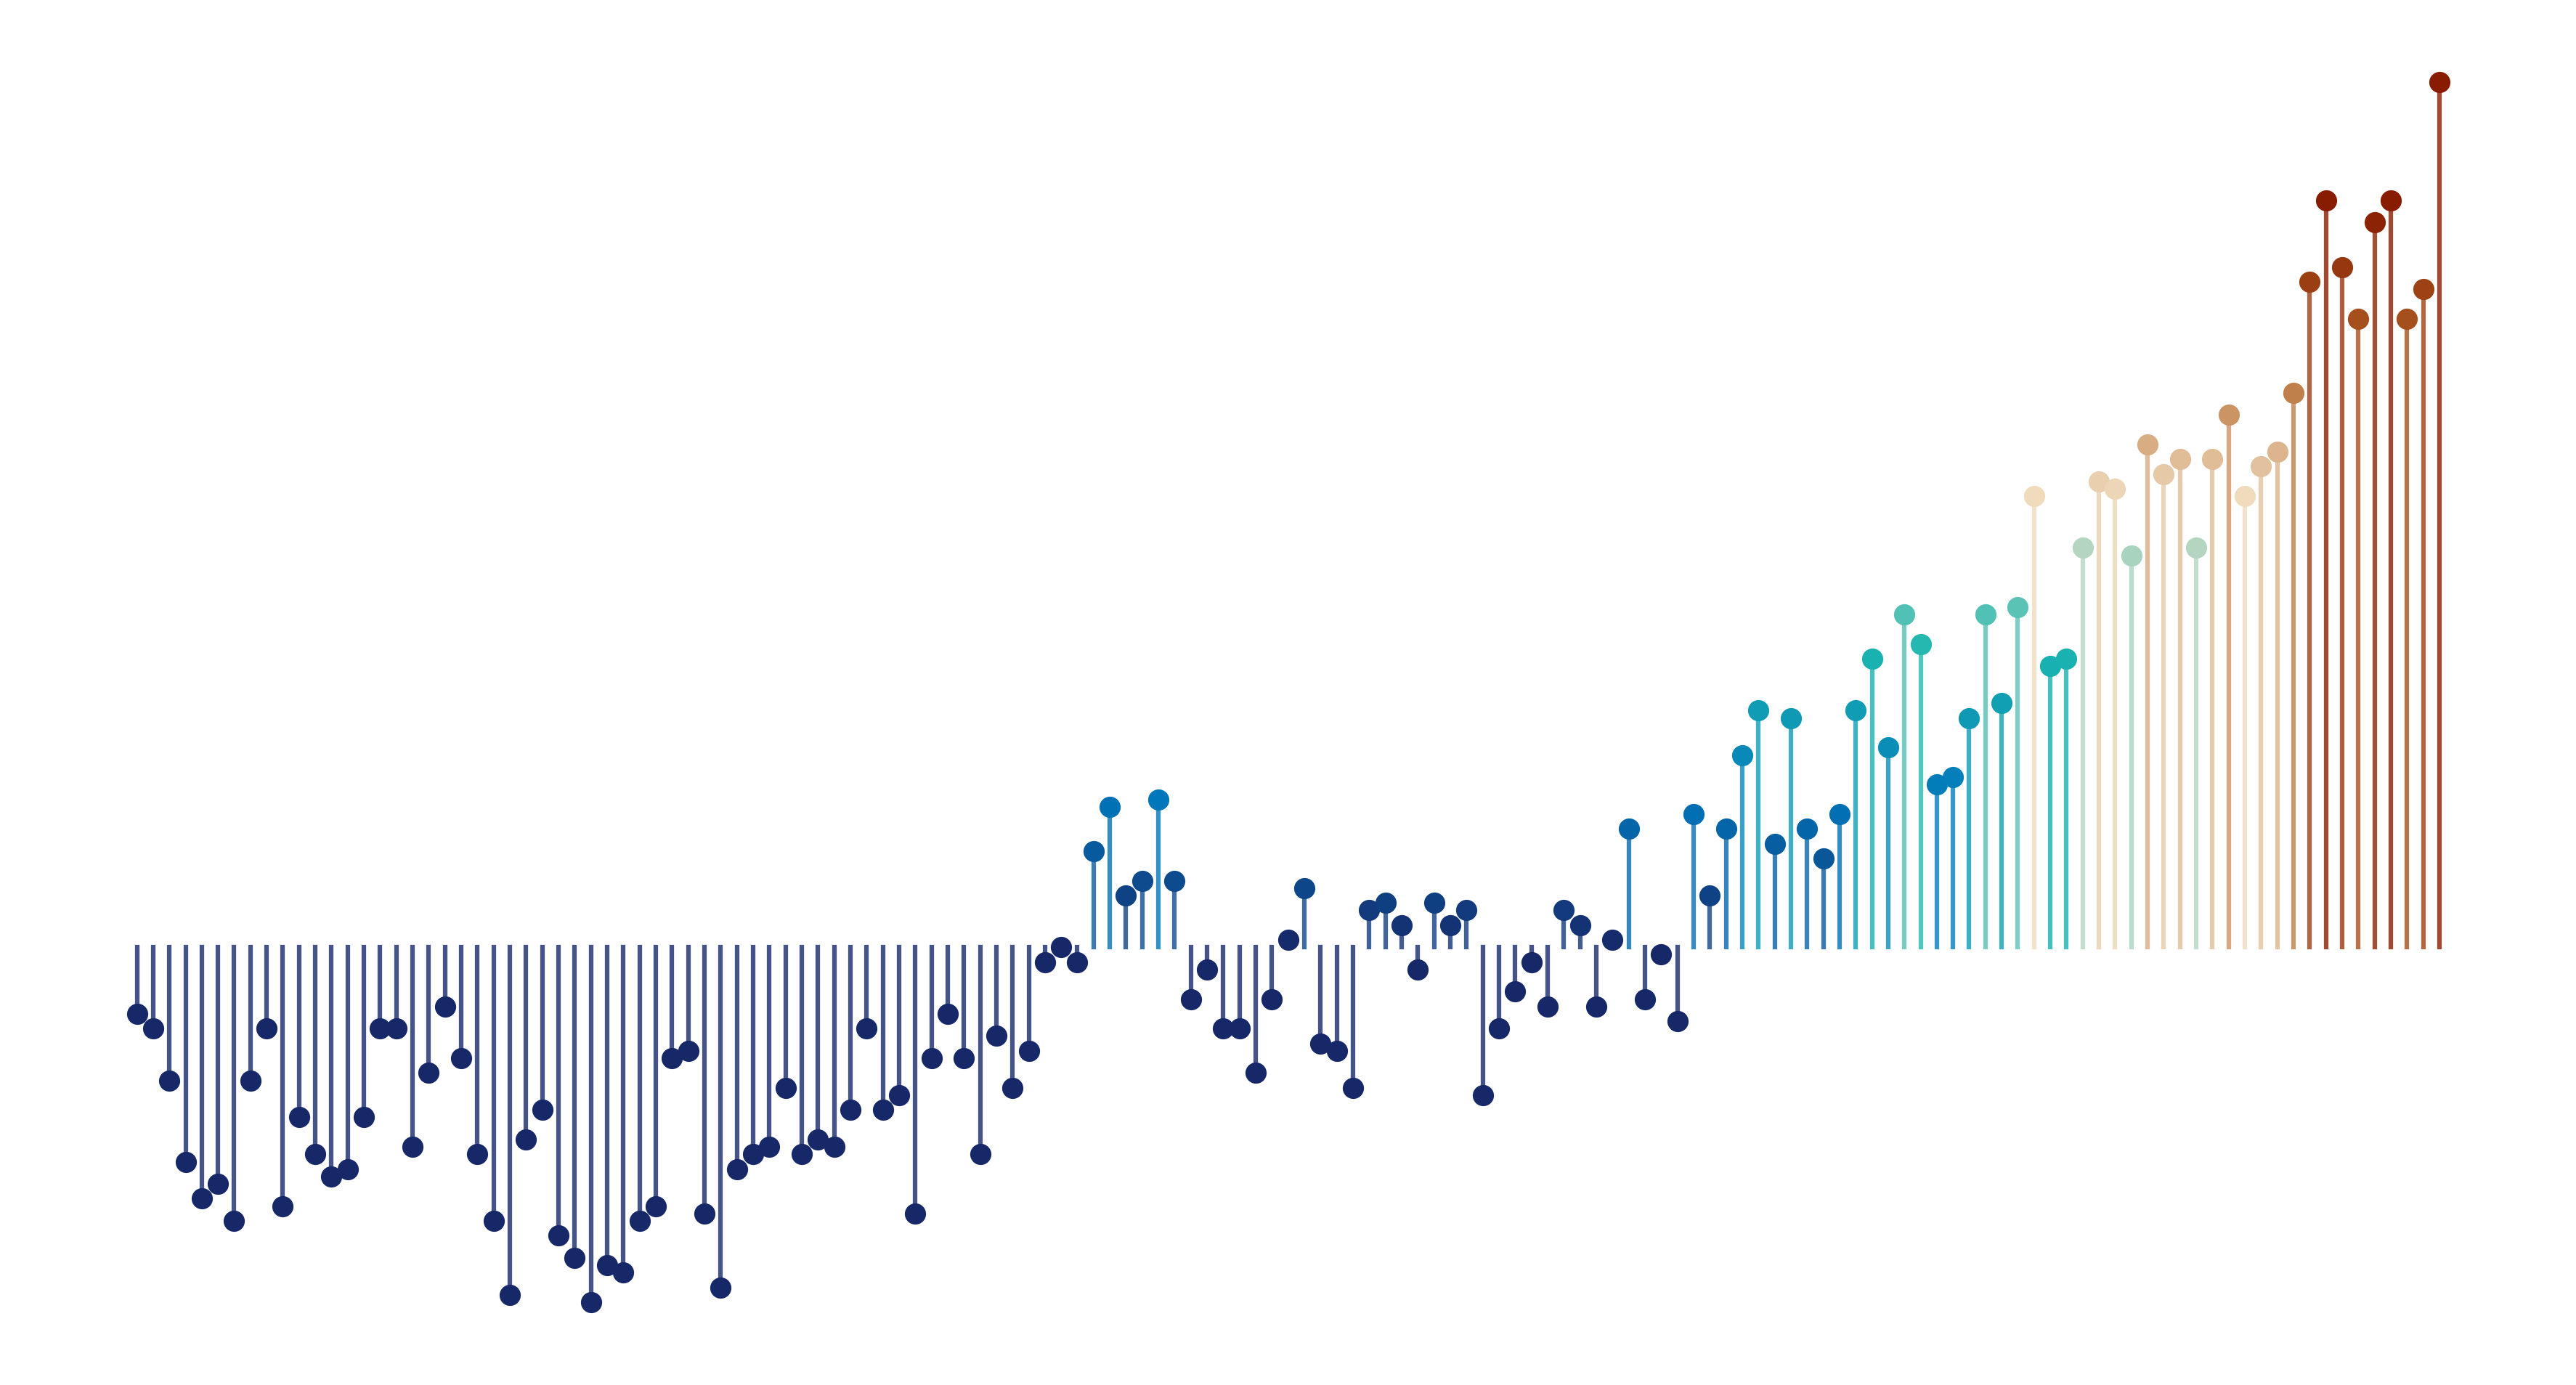

In [4]:
cmap = load_cmap('Coconut', cmap_type='continuous', reverse=True)
fig, ax = plt.subplots(figsize=(15,8), dpi=300)
ax.set_axis_off()

for i, row in df.iterrows():
   year = row['Year']
   change = row['Change']
   color = cmap(change)
   ax.scatter(x=year, y=change, color=color)
   ax.plot([year,year], [0,change], color=color, alpha=0.8)

plt.show()

## Create custom axis

To draw custom axes for this chart:

- **X-Axis Labels**:

  - For each year divisible by 20 (`if year % 20 == 0`):
    - `ax.text(x=year, y=-0.6, s=f'{year:.0f}', ...)` adds the year as a label below the x-axis.
  - Adds an extra label for 1880 manually since it's not in the original data.

- **Horizontal Lines (Custom Y-Axis)**:

  - `ax.hlines(y=h_lines, xmin=1881, xmax=2023, ...)` draws horizontal lines at specified `h_lines` values.
  - `xmin` and `xmax` define the line's start and end on the x-axis.

- **Y-Axis Labels**:
  - For each value in `h_lines`, `ax.text(x=1877, y=value, s=f'{value}', ...)` adds the value as a label beside the y-axis.


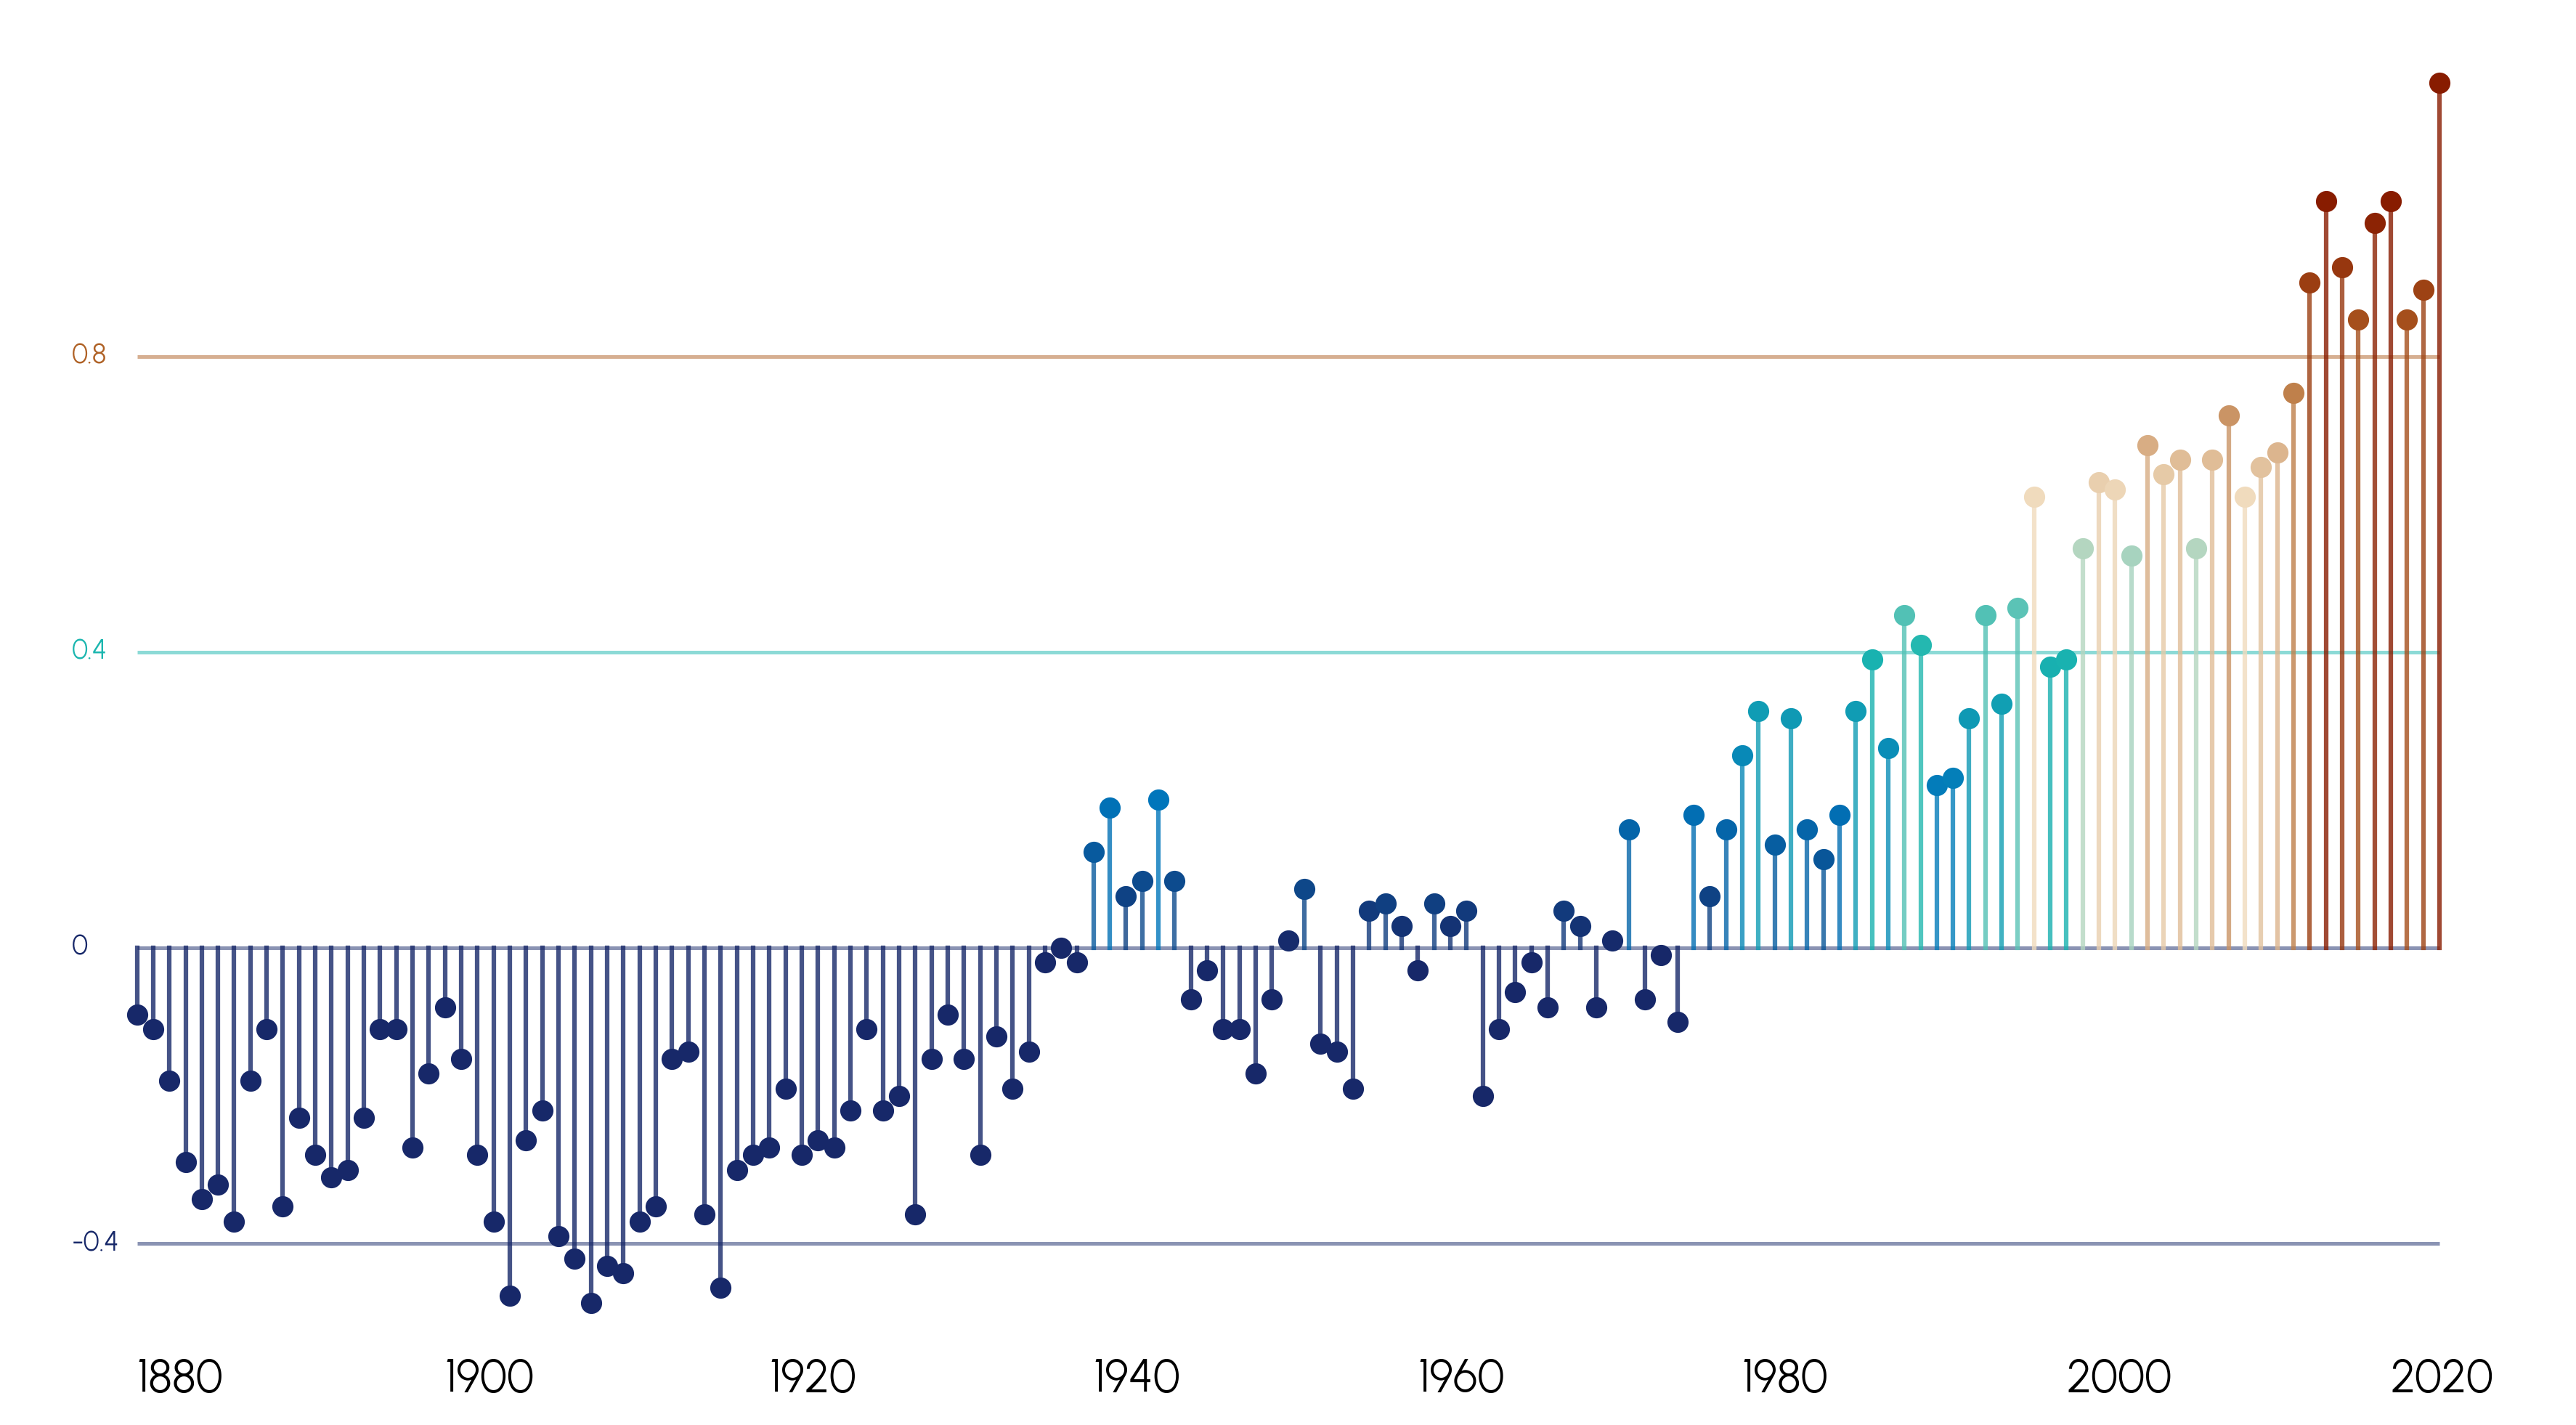

In [5]:
cmap = load_cmap('Coconut', cmap_type='continuous', reverse=True)
font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Light.ttf?raw=true')
bold_font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Medium.ttf?raw=true')

fig, ax = plt.subplots(figsize=(15,8), dpi=300)
ax.set_axis_off()

for i, row in df.iterrows():
   year = row['Year']
   change = row['Change']
   color = cmap(change)
   ax.scatter(x=year, y=change, color=color)
   ax.plot([year,year], [0,change], color=color, alpha=0.8)

   if year % 20 == 0:
      ax.text(x=year, y=-0.6, s=f'{year:.0f}', font=font, size=15, ha='left')
ax.text(x=1881, y=-0.6, s=f'{1880}', font=font, size=15, ha='left')

h_lines = [-0.4, 0, 0.4, 0.8]
ax.hlines(y=h_lines, xmin=1881, xmax=2023, colors=[cmap(val) for val in h_lines], linewidth=1.2, zorder=-1, alpha=0.5)
for value in h_lines:
   ax.text(x=1877, y=value, s=f'{value}', font=font, color=cmap(value), size=9, va='center')

plt.show()

## Final chart with annotations

Once we have the core of the chart, we just need to **add some annotations**:

- the fonts are loaded thanks to [pyfonts](/pyfonts)
- the arrows are added thanks to [drawarrow](/drawarrow)
- the text in the annotations is formatted thanks to [highlight_text](/advanced-custom-annotations-matplotlib)


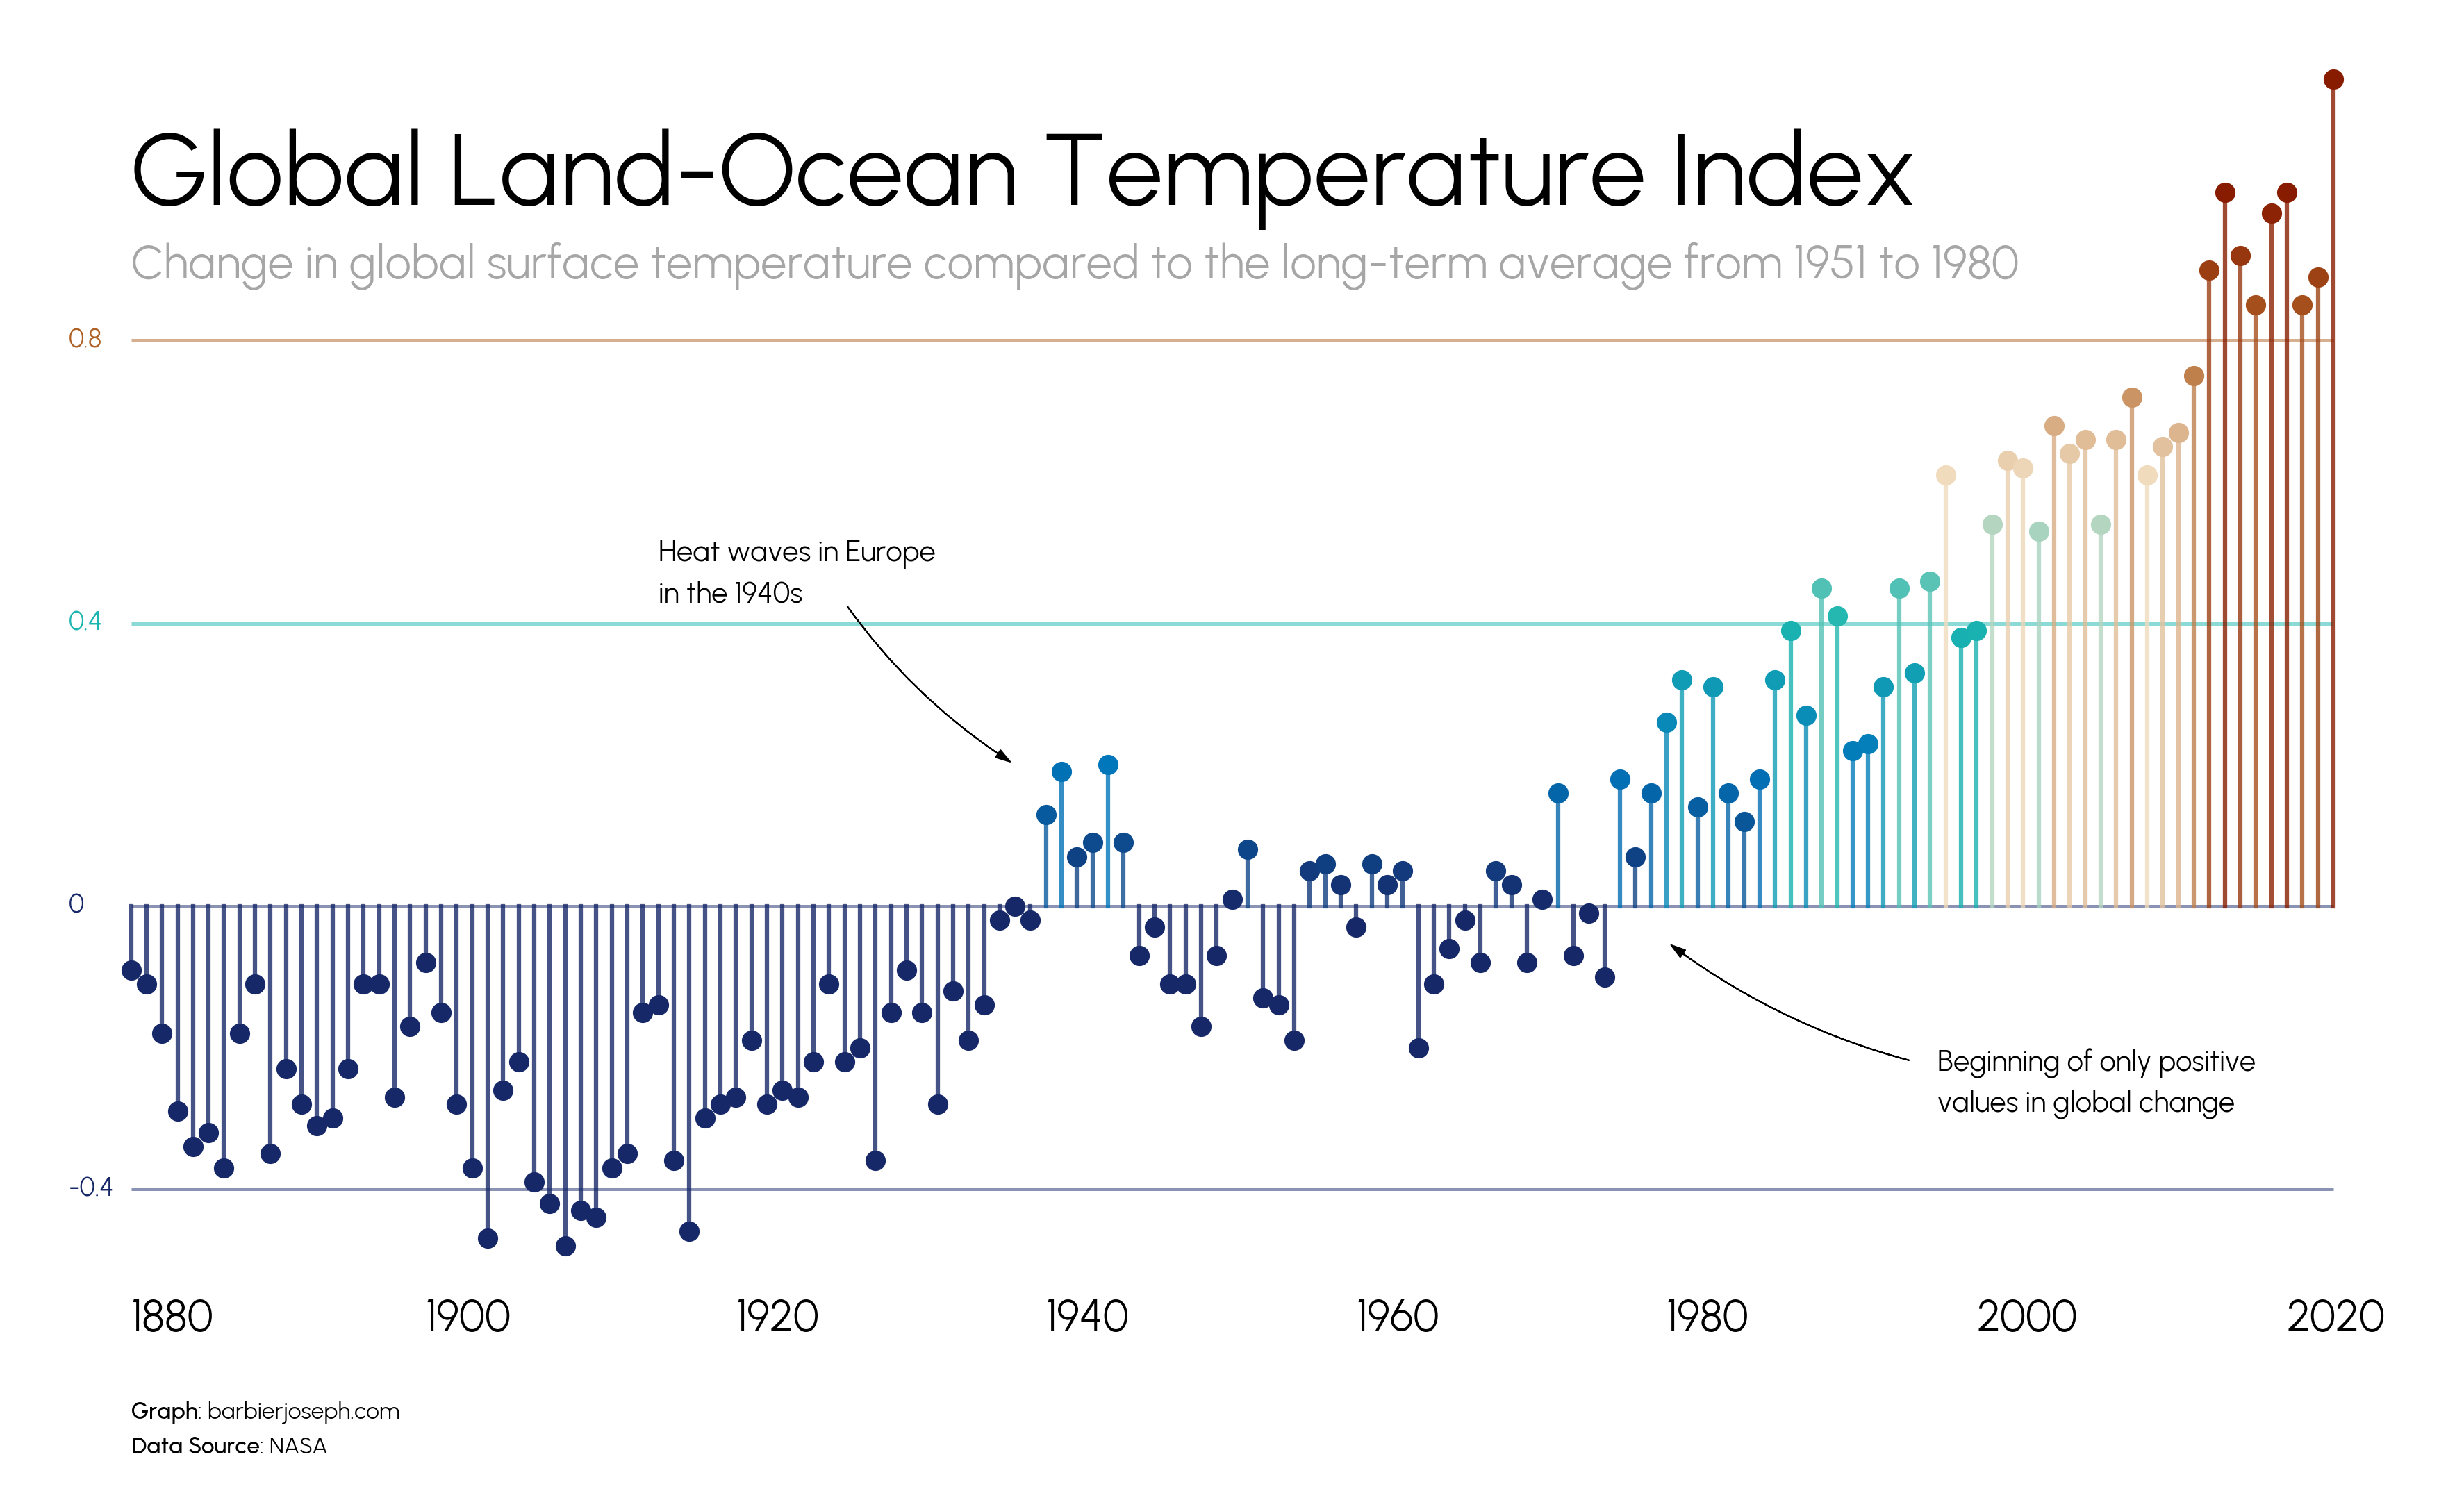

In [6]:
cmap = load_cmap('Coconut', cmap_type='continuous', reverse=True)
font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Light.ttf?raw=true')
bold_font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Medium.ttf?raw=true')
arrow_props = dict(color='black', tail_width=0.05, linewidth=0.5, head_width=3, head_length=5)

fig, ax = plt.subplots(figsize=(15,8), dpi=300)
ax.set_axis_off()

for i, row in df.iterrows():
   year = row['Year']
   change = row['Change']
   color = cmap(change)
   ax.scatter(x=year, y=change, color=color)
   ax.plot([year,year], [0,change], color=color, alpha=0.8)
   
   if year % 20 == 0:
      ax.text(x=year, y=-0.6, s=f'{year:.0f}', font=font, size=15, ha='left')
ax.text(x=1881, y=-0.6, s=f'{1880}', font=font, size=15, ha='left')

h_lines = [-0.4, 0, 0.4, 0.8]
ax.hlines(y=h_lines, xmin=1881, xmax=2023, colors=[cmap(val) for val in h_lines], linewidth=1.2, zorder=-1, alpha=0.5)
for value in h_lines:
   ax.text(x=1877, y=value, s=f'{value}', font=font, color=cmap(value), size=9, va='center')

s = 'Global Land-Ocean Temperature Index'
ax_text(x=1881, y=1.1, s=s, font=font, size=35, ha='left')

s = 'Change in global surface temperature compared to the long-term average from 1951 to 1980'
ax_text(x=1881, y=0.94, s=s, font=font, size=16, ha='left', color='grey', alpha=0.7)

s = '<Graph>: barbierjoseph.com\n<Data Source>: NASA'
ax_text(x=1881, y=-0.7, s=s, font=font, size=8, ha='left', highlight_textprops=[{'font': bold_font}]*2)

s = 'Heat waves in Europe\nin the 1940s'
ax_text(x=1915, y=0.52, s=s, font=font, size=10, ha='left')
ax_arrow(
   tail_position=(1927, 0.43), head_position=(1938, 0.2), **arrow_props
)

s = 'Beginning of only positive\nvalues in global change'
ax_text(x=2018, y=-0.2, s=s, font=font, size=10, ha='right')
ax_arrow(
   tail_position=(1996, -0.22), head_position=(1980, -0.05), invert=True, **arrow_props
)

plt.savefig('../../static/graph/web-lollipop-with-colormap-and-arrow.png', dpi=300, bbox_inches='tight')
plt.show()

## Going further

You might be interested in:

- how to create a [dumbell chart](/web-lollipop-plot-with-python-mario-kart-64-world-records)
- how to use a [lollipop for a time series](/web-lollipop-plot-with-python-the-office)
- this tuto about [circular lollipop](/web-circular-lollipop-plot-with-matplotlib)
